In [25]:
import pandas as pd
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing, Holt

In [2]:
df = pd.read_csv('Data/airline_passengers.csv',index_col=0,parse_dates=True)
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
df.shape

(144, 1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
Thousands of Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


In [5]:
df.isna().sum()

Thousands of Passengers    0
dtype: int64

In [6]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [7]:
df.index.freq = 'MS' # Monthly-stary frequency

In [8]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [10]:
span = 12
alpha = 2/(span+1)

In [13]:
df['EWMA12'] = df['Thousands of Passengers'].ewm(alpha=alpha,adjust=False).mean()

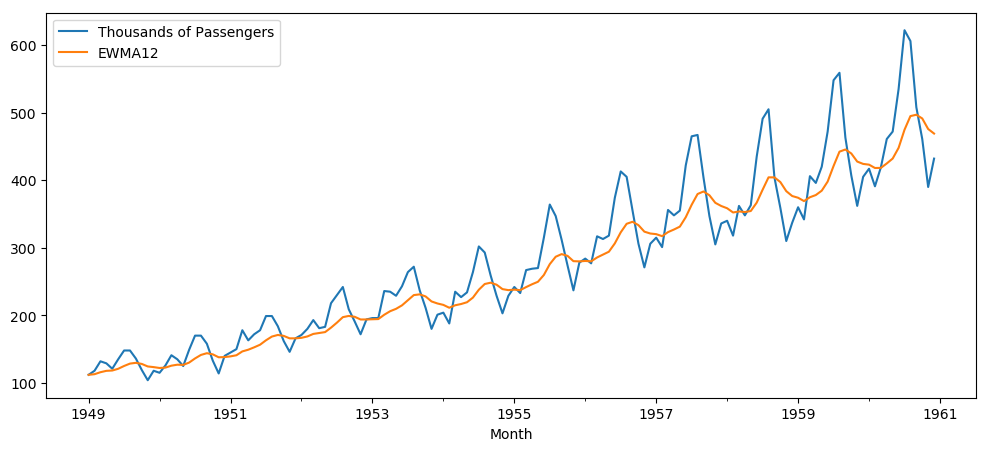

In [14]:
df[['Thousands of Passengers','EWMA12']].plot(figsize=(12,5));

In [15]:
df.head()

,Thousands of Passengers,EWMA12
Month,,
1949-01-01,112,112.000000
1949-02-01,118,112.923077
1949-03-01,132,115.857988
1949-04-01,129,117.879836
1949-05-01,121,118.359861


In [16]:
model = SimpleExpSmoothing(df['Thousands of Passengers'])
model

In [18]:
fitted_model = model.fit(smoothing_level=alpha,optimized=False)
fitted_model

In [21]:
df['SES12'] = fitted_model.fittedvalues.shift(-1)
df.head()

,Thousands of Passengers,EWMA12,SES12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861


In [22]:
df['SES12'] = SimpleExpSmoothing(df['Thousands of Passengers']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)

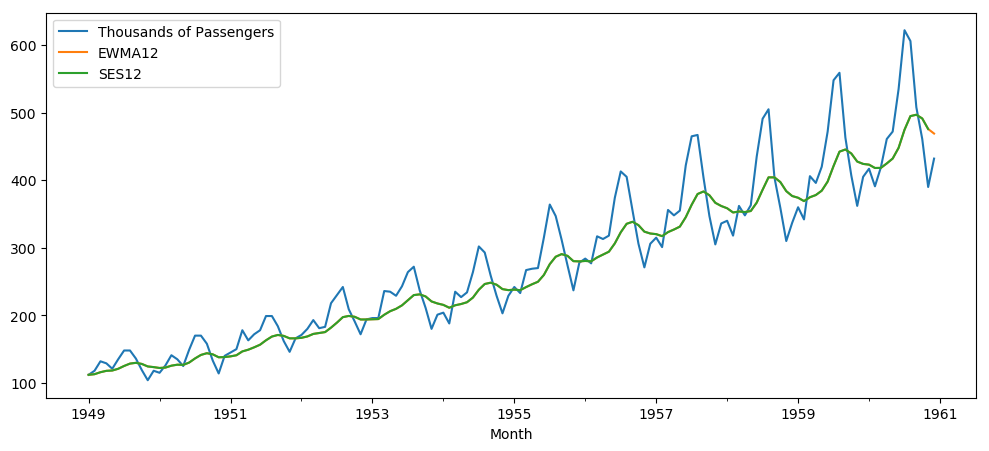

In [26]:
df[['Thousands of Passengers','EWMA12','SES12']].plot(figsize=(12,5));

In [28]:
df['DES_add_12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='add').fit().fittedvalues.shift(-1)

In [30]:
df.head()

,Thousands of Passengers,EWMA12,SES12,DES_add_12
Month,,,,
1949-01-01,112,112.000000,112.000000,114.336774
1949-02-01,118,112.923077,112.923077,120.336774
1949-03-01,132,115.857988,115.857988,134.336774
1949-04-01,129,117.879836,117.879836,131.336774
1949-05-01,121,118.359861,118.359861,123.336774


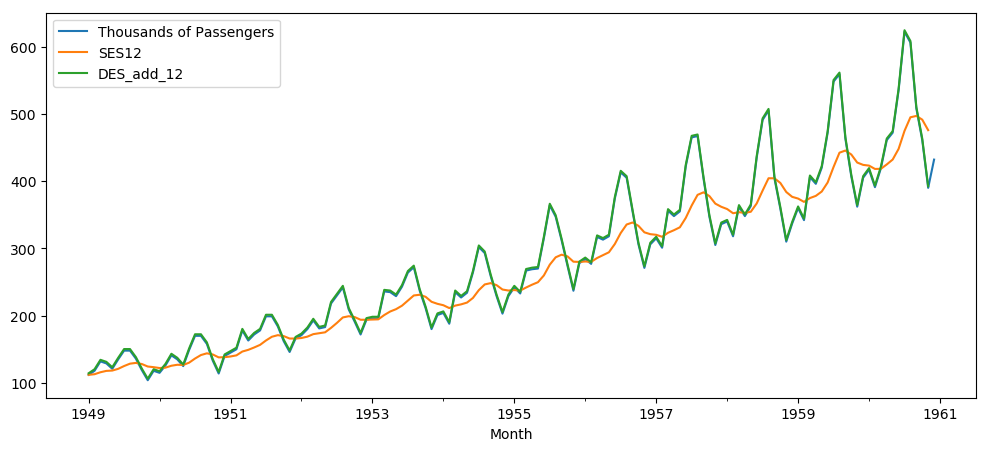

In [33]:
df[['Thousands of Passengers','SES12','DES_add_12']].plot(figsize=(12,5));

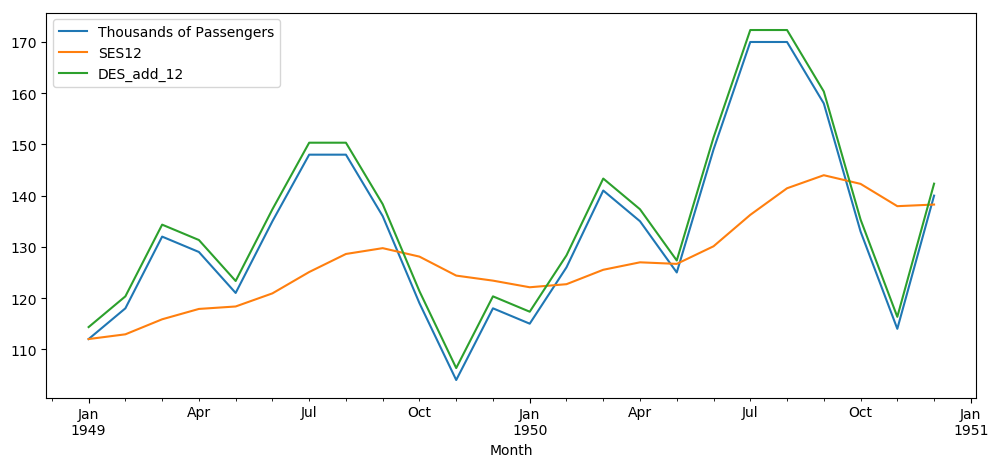

In [31]:
df[['Thousands of Passengers','SES12','DES_add_12']].iloc[:24].plot(figsize=(12,5));

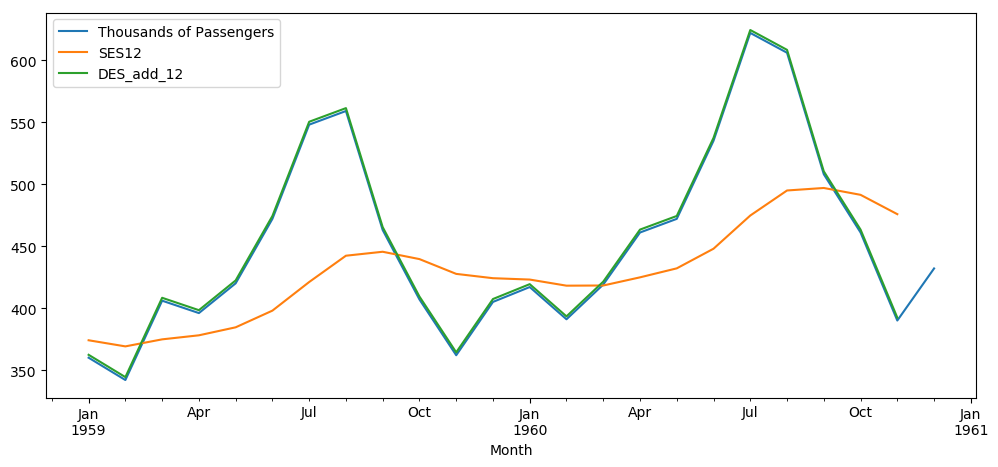

In [32]:
df[['Thousands of Passengers','SES12','DES_add_12']].iloc[-24:].plot(figsize=(12,5));

In [34]:
df['DES_mul_12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul').fit().fittedvalues.shift(-1)
df.head()

,Thousands of Passengers,EWMA12,SES12,DES_add_12,DES_mul_12
Month,,,,,
1949-01-01,112,112.000000,112.000000,114.336774,112.049247
1949-02-01,118,112.923077,112.923077,120.336774,118.051885
1949-03-01,132,115.857988,115.857988,134.336774,132.058041
1949-04-01,129,117.879836,117.879836,131.336774,129.056722
1949-05-01,121,118.359861,118.359861,123.336774,121.053204


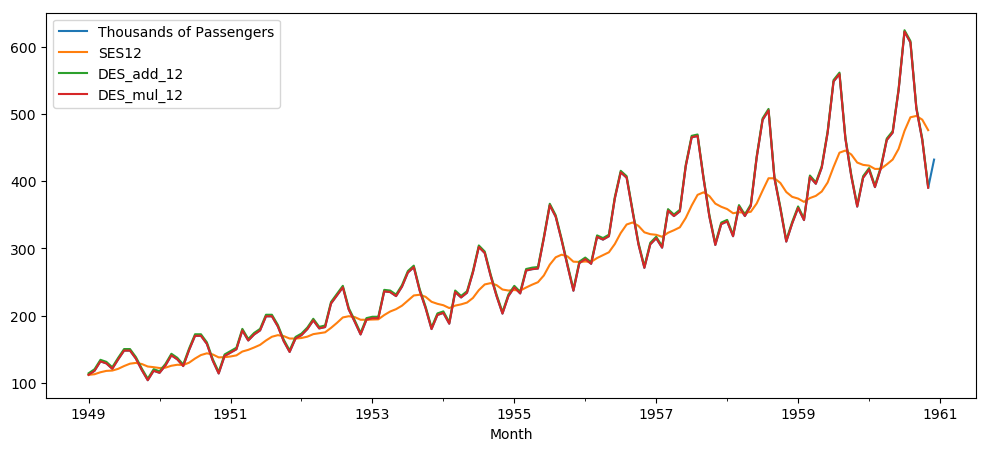

In [35]:
df[['Thousands of Passengers','SES12','DES_add_12','DES_mul_12']].plot(figsize=(12,5));

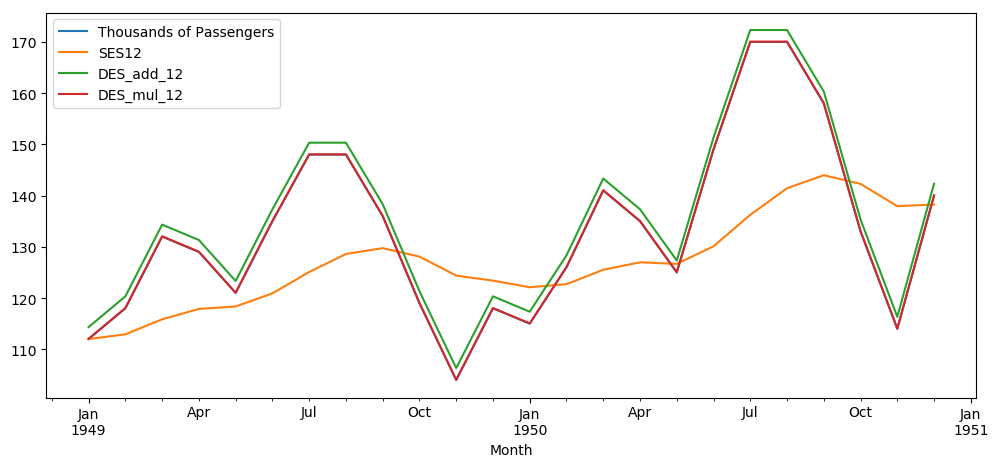

In [36]:
df[['Thousands of Passengers','SES12','DES_add_12','DES_mul_12']].iloc[:24].plot(figsize=(12,5));

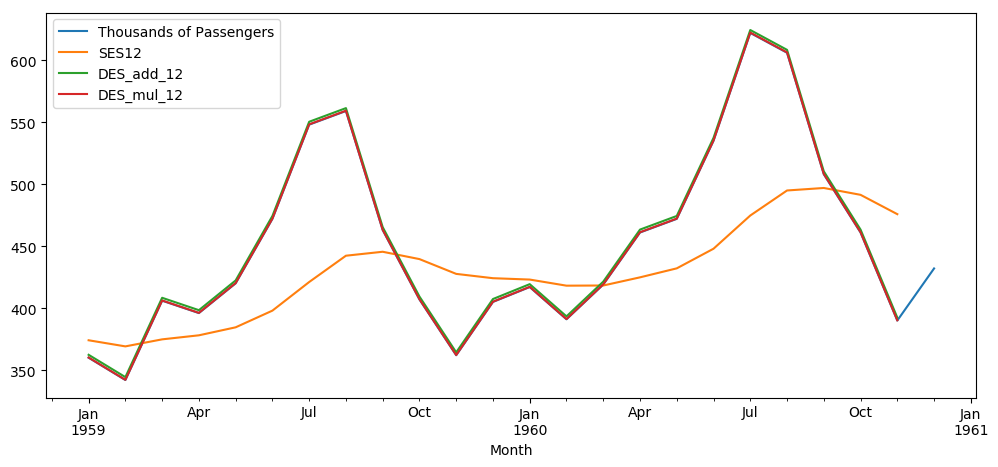

In [37]:
df[['Thousands of Passengers','SES12','DES_add_12','DES_mul_12']].iloc[-24:].plot(figsize=(12,5));

In [42]:
df['TES_add_12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='add',seasonal_periods=12).fit().fittedvalues
df.head()

,Thousands of Passengers,EWMA12,SES12,DES_add_12,DES_mul_12,TES_mul_12,TES_add_12
Month,,,,,,,
1949-01-01,112,112.000000,112.000000,114.336774,112.049247,111.753654,116.221123
1949-02-01,118,112.923077,112.923077,120.336774,118.051885,118.993207,125.399510
1949-03-01,132,115.857988,115.857988,134.336774,132.058041,133.458671,139.791387
1949-04-01,129,117.879836,117.879836,131.336774,129.056722,127.957617,135.736510
1949-05-01,121,118.359861,118.359861,123.336774,121.053204,121.027379,126.837057


In [38]:
df['TES_mul_12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
df.head()

,Thousands of Passengers,EWMA12,SES12,DES_add_12,DES_mul_12,TES_mul_12
Month,,,,,,
1949-01-01,112,112.000000,112.000000,114.336774,112.049247,111.753654
1949-02-01,118,112.923077,112.923077,120.336774,118.051885,118.993207
1949-03-01,132,115.857988,115.857988,134.336774,132.058041,133.458671
1949-04-01,129,117.879836,117.879836,131.336774,129.056722,127.957617
1949-05-01,121,118.359861,118.359861,123.336774,121.053204,121.027379


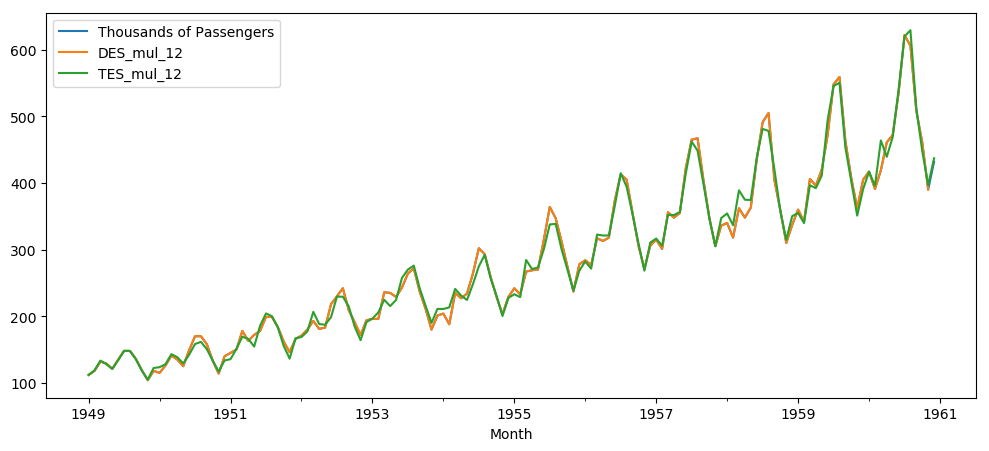

In [41]:
df[['Thousands of Passengers','DES_mul_12','TES_mul_12']].plot(figsize=(12,5));

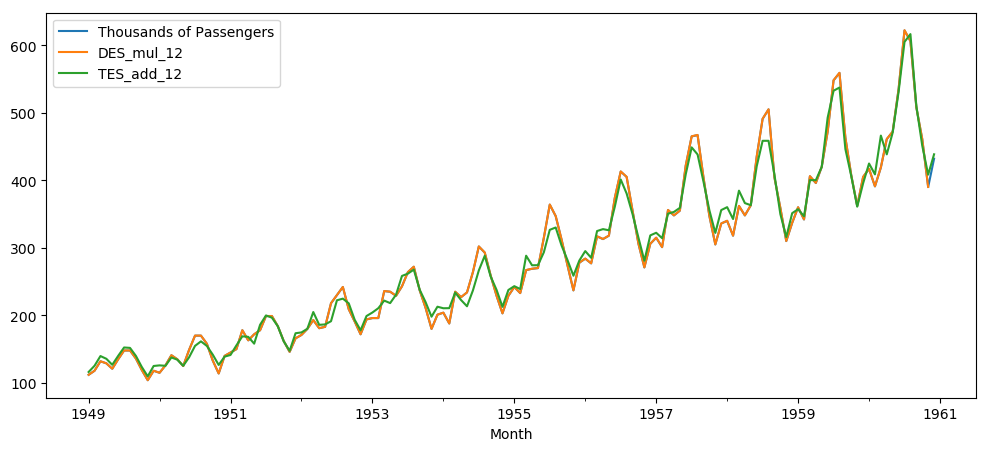

In [47]:
df[['Thousands of Passengers','DES_mul_12','TES_add_12']].plot(figsize=(12,5));

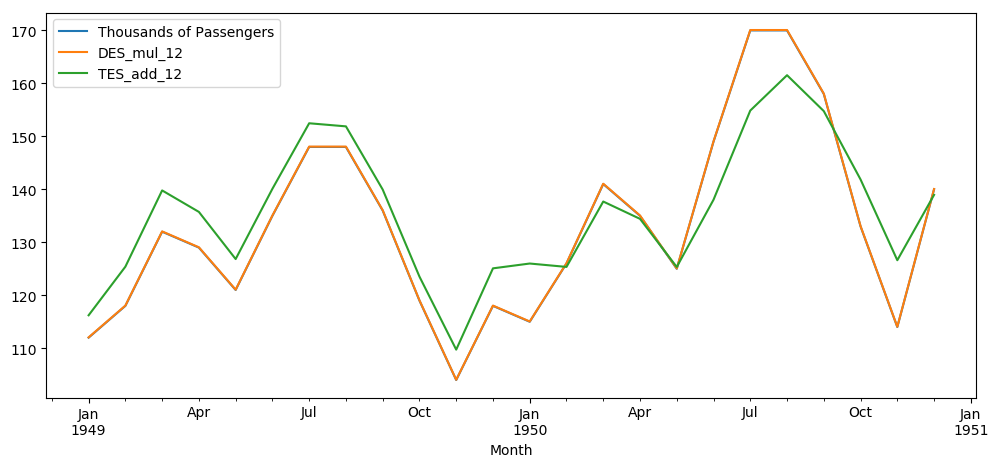

In [45]:
df[['Thousands of Passengers','DES_mul_12','TES_add_12']].iloc[:24].plot(figsize=(12,5));

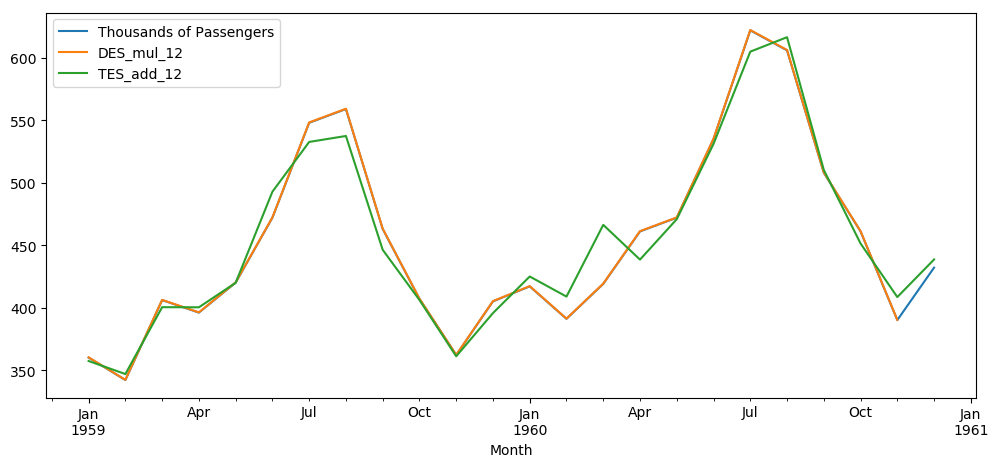

In [46]:
df[['Thousands of Passengers','DES_mul_12','TES_add_12']].iloc[-24:].plot(figsize=(12,5));

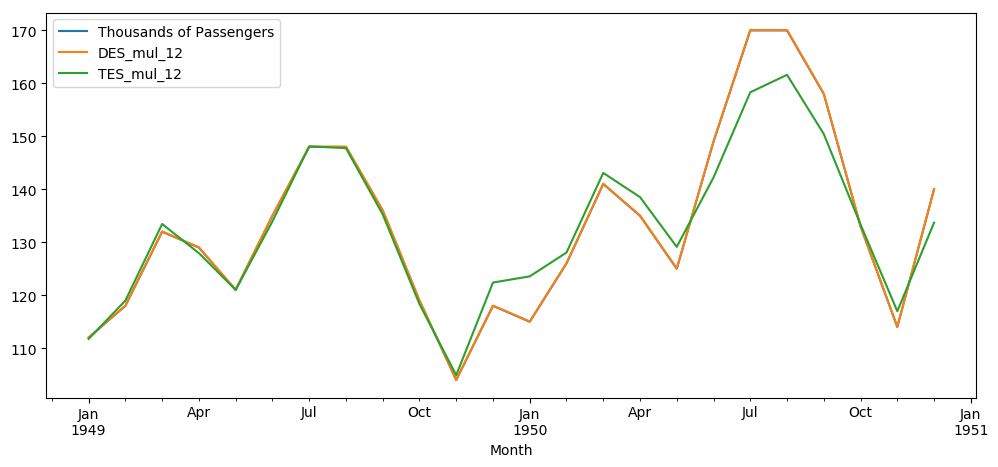

In [43]:
df[['Thousands of Passengers','DES_mul_12','TES_mul_12']].iloc[:24].plot(figsize=(12,5));

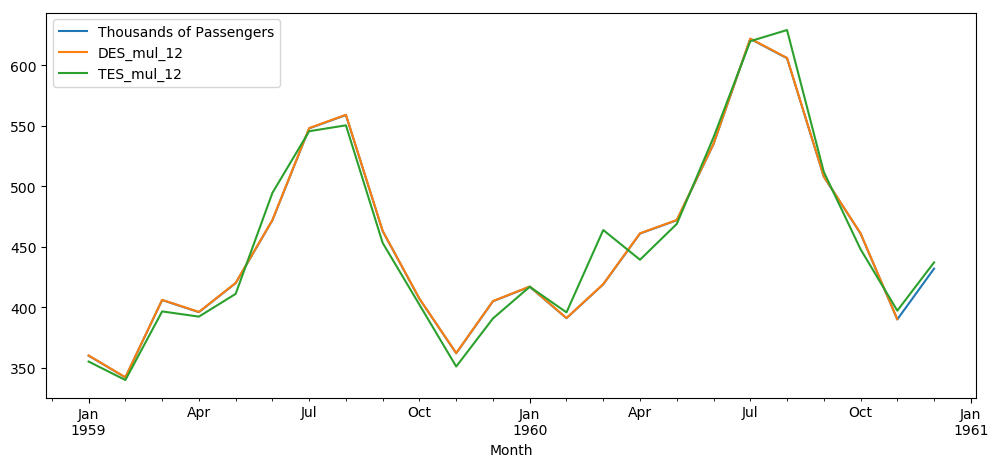

In [44]:
df[['Thousands of Passengers','DES_mul_12','TES_mul_12']].iloc[-24:].plot(figsize=(12,5));